In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score
import math

In [3]:
dataset = pd.read_csv("50_Startups.csv")

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.shape

(50, 5)

Seeing correlation visually between Marketing Spend and Profit

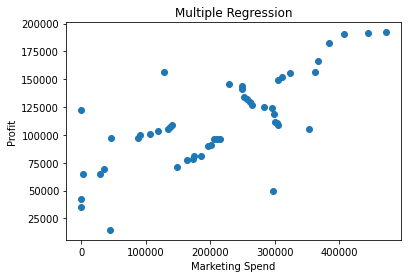

In [6]:
plt.scatter(dataset['Marketing Spend'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

as we can see marketing is fairly linearly , so marketing is important varibale for predicting profit

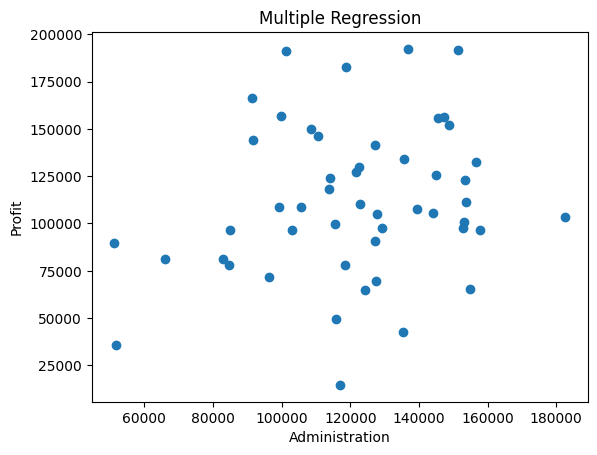

In [ ]:
plt.scatter(dataset['Administration'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

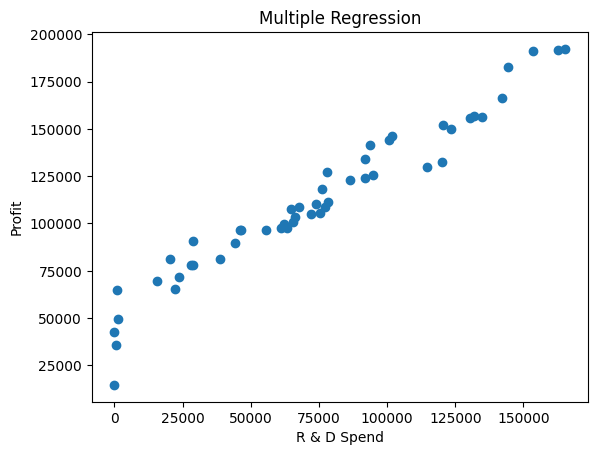

In [ ]:
plt.scatter(dataset['R&D Spend'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('R & D Spend')
plt.ylabel('Profit')
plt.show()


In [ ]:
dataset['NewYork']=np.where(dataset['State'] == 'New York' , 1, 0)
dataset['California']=np.where(dataset['State'] == 'California' , 1, 0)
dataset['Florida']=np.where(dataset['State'] == 'Florida' , 1, 0)



In [ ]:
dataset.drop(columns=['State'], axis=1,inplace=True)

In [ ]:
dataset_without_administration = dataset.copy()

In [ ]:
dataset_without_administration.drop(columns=['Administration'], axis=1,inplace=True)

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dataset_without_administration.head()

,R&D Spend,Marketing Spend,Profit,NewYork,California,Florida
0,165349.20,471784.10,192261.83,1,0,0
1,162597.70,443898.53,191792.06,0,1,0
2,153441.51,407934.54,191050.39,0,0,1
3,144372.41,383199.62,182901.99,1,0,0
4,142107.34,366168.42,166187.94,0,0,1


Seperating columns into dependent and independent variables

In [ ]:
dependent_variable = "Profit"

In [ ]:
independent_variable = dataset.columns.tolist()

In [ ]:
independent_variable_na = dataset_without_administration.columns.tolist()

In [ ]:
independent_variable.remove(dependent_variable)

In [ ]:
independent_variable_na.remove(dependent_variable)

In [ ]:
independent_variable

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork',
 'California',
 'Florida']

In [ ]:
independent_variable_na

['R&D Spend', 'Marketing Spend', 'NewYork', 'California', 'Florida']

In [ ]:
X1= dataset[independent_variable].values
X2= dataset[independent_variable_na].values
y = dataset[dependent_variable].values

Splitting dataset into Training set and Test set

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2,random_state=0)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2,random_state=0)

Transforming data into 0 to 1

In [ ]:
scaler = MinMaxScaler()
X1_train =scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)
X2_train =scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

In [ ]:
X1_train[0:10]
X2_train[0:10]

array([[0.33561668, 0.45494286, 0.        , 0.        , 1.        ],
       [0.2782839 , 0.43561799, 1.        , 0.        , 0.        ],
       [0.45557444, 0.28413435, 0.        , 0.        , 1.        ],
       [0.2807759 , 0.44680961, 0.        , 1.        , 0.        ],
       [0.55488118, 0.62511553, 0.        , 0.        , 1.        ],
       [0.7880179 , 0.68649342, 0.        , 0.        , 1.        ],
       [0.72539353, 0.54370828, 0.        , 0.        , 1.        ],
       [0.0060492 , 0.0040356 , 1.        , 0.        , 0.        ],
       [0.00327821, 0.        , 1.        , 0.        , 0.        ],
       [0.39676926, 0.22709197, 1.        , 0.        , 0.        ]])

Performing Regression

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train , y1_train)
model2 = LinearRegression()
model2.fit(X2_train , y2_train)

LinearRegression()

Prediction

In [ ]:
y_pred1_train = model1.predict(X1_train)
y_pred2_train = model2.predict(X2_train)

In [ ]:
y_pred1_test = model1.predict(X1_test)
y_pred2_test = model2.predict(X2_test)

Evaluation

In [ ]:
print(f"error for model 1 from training dataset  {math.sqrt(mean_squared_error(y1_train, y_pred1_train))}")
print(f"error for model 2 from training dataset {math.sqrt(mean_squared_error(y2_train, y_pred2_train))}")

error for model 1 from training dataset  9031.66661257897
error for model 2 from training dataset 9064.118245163729


In [ ]:
print(f"error for model 1 from testing dataset  {math.sqrt(mean_squared_error(y1_test, y_pred1_test))}")
print(f"error for model 2 from testing dataset {math.sqrt(mean_squared_error(y2_test, y_pred2_test))}")

error for model 1 from testing dataset  15023.010725678325
error for model 2 from testing dataset 14374.823928860696


In [ ]:
print(f"score for model 1 from testing dataset {r2_score(y1_test, y_pred1_test)}")
print(f"score for model 2 from testing dataset {r2_score(y2_test, y_pred2_test)}")

score for model 1 from testing dataset 0.8235262062096438
score for model 2 from testing dataset0.8384260525940855


In [ ]:
print(f"score for model 1 from training dataset {r2_score(y1_train, y_pred1_train)}")
print(f"score for model 2 from training dataset {r2_score(y2_train, y_pred2_train)}")

score for model 1 from training dataset 0.9501847627493607
score for model 2 from training dataset 0.9498261378977877


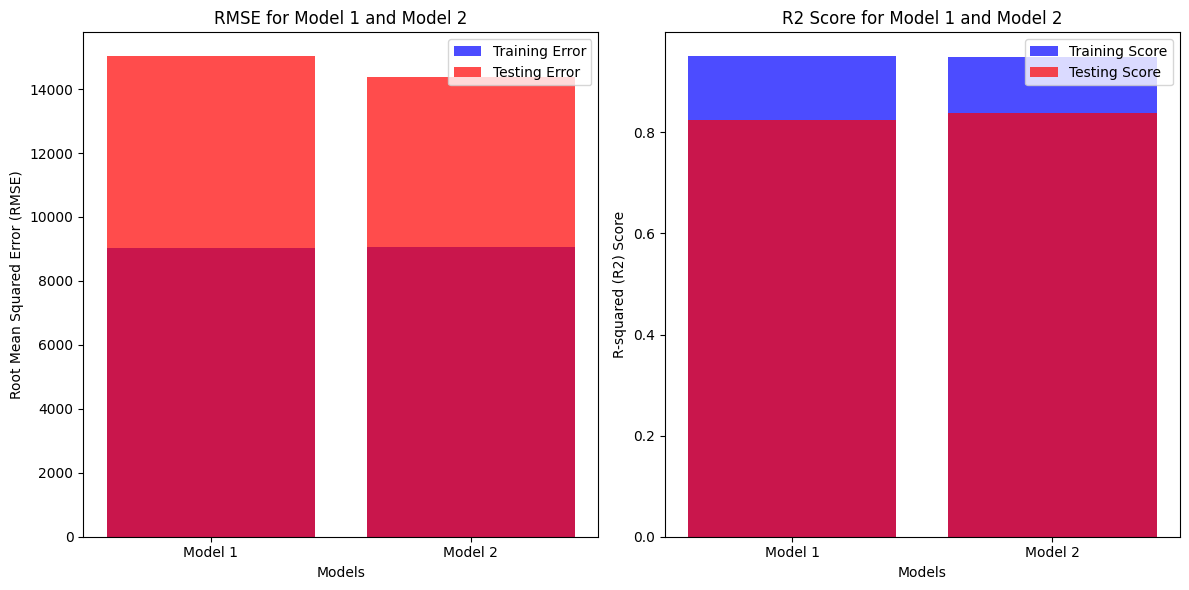

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the error and score values
model_names = ['Model 1', 'Model 2']
train_errors = [math.sqrt(mean_squared_error(y1_train, y_pred1_train)),
                math.sqrt(mean_squared_error(y2_train, y_pred2_train))]
test_errors = [math.sqrt(mean_squared_error(y1_test, y_pred1_test)),
               math.sqrt(mean_squared_error(y2_test, y_pred2_test))]
train_scores = [r2_score(y1_train, y_pred1_train),
                r2_score(y2_train, y_pred2_train)]
test_scores = [r2_score(y1_test, y_pred1_test),
               r2_score(y2_test, y_pred2_test)]

# Plotting the errors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(model_names, train_errors, color='blue', alpha=0.7, label='Training Error')
plt.bar(model_names, test_errors, color='red', alpha=0.7, label='Testing Error')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE for Model 1 and Model 2')
plt.legend()

# Plotting the scores
plt.subplot(1, 2, 2)
plt.bar(model_names, train_scores, color='blue', alpha=0.7, label='Training Score')
plt.bar(model_names, test_scores, color='red', alpha=0.7, label='Testing Score')
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.title('R2 Score for Model 1 and Model 2')
plt.legend()

plt.tight_layout()
plt.show()

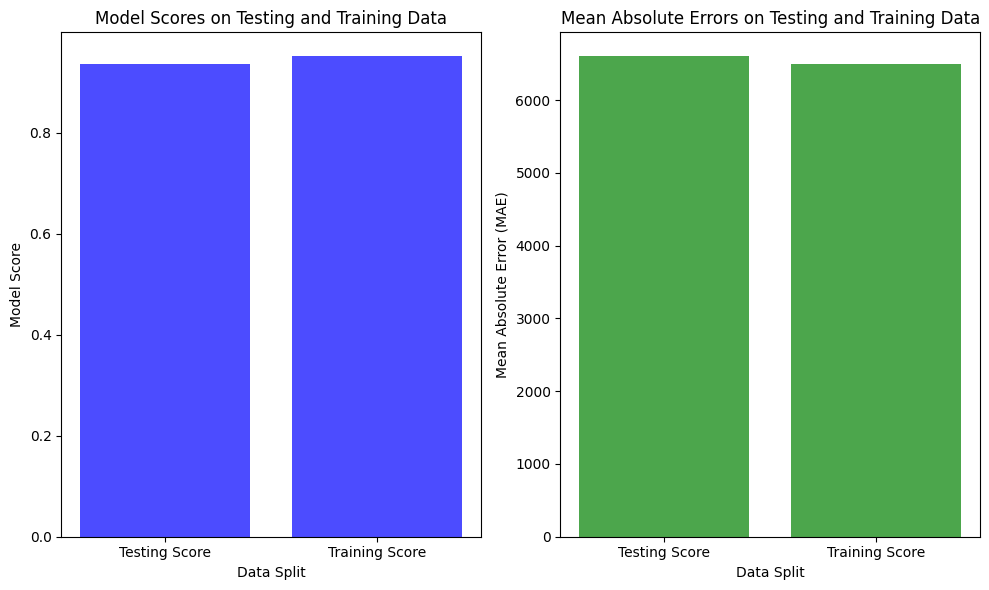

In [ ]:
model_scores = [0.9355139722149948, 0.9515496105627431]
mae_values = [6601.829303578641, 6503.577323580025]
data_labels = ['Testing Score', 'Training Score']

# Create a bar chart for model scores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(data_labels, model_scores, color='blue', alpha=0.7)
plt.xlabel('Data Split')
plt.ylabel('Model Score')
plt.title('Model Scores on Testing and Training Data')

# Create a bar chart for mean absolute errors
plt.subplot(1, 2, 2)
plt.bar(data_labels, mae_values, color='green', alpha=0.7)
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Errors on Testing and Training Data')

plt.tight_layout()
plt.show()






